In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [411]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period , identify which factors predict future user adoption.

In [0]:
df = pd.read_csv('drive/My Drive/1 myself/springboard 2019-20/Take home/relax_challenge/takehome_user_engagement.csv')

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [414]:
#How many users and how many times did they visit? 
print('There were {} users and {} logins'.format(df['user_id'].nunique(), len(df)))

There were 8823 users and 207917 logins


In [0]:
# change time_stamp Dtype into datetime object.
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

In [0]:
# get 'adopted user' login three different days during one 7 days period
def adopted_function (data, days=7, logins=3):
  data['date'] = data['time_stamp'].dt.date
  data = data.drop_duplicates(subset='date').sort_values('date')
  dates = data['date'].diff(periods=logins-1)
  return any (dates <= timedelta(days=days))

In [0]:
# grouping users
users = df.groupby('user_id')


In [0]:
group = users.apply (lambda x : adopted_function(x.sort_values(by='time_stamp', ascending=False)))


# Adopted users selected in 'group' column

In [419]:
print('there were {} adopted users out of {} users'.format(sum(group), len(group)))

there were 1656 adopted users out of 8823 users


#Identify which factors predict future user adoption.

In [0]:
df1 = pd.read_csv('drive/My Drive/1 myself/springboard 2019-20/Take home/relax_challenge/takehome_users.csv', encoding='latin-1')

In [421]:
df1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [422]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [0]:
df1['group'] = group

In [424]:
df1.group.dropna()

1        False
2         True
3        False
4        False
5        False
         ...  
11995    False
11996    False
11997    False
11998    False
11999    False
Name: group, Length: 8822, dtype: object

In [425]:
df1.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
group                         3178
dtype: int64

In [0]:
df1.dropna(subset=['invited_by_user_id','group'], inplace=True)

In [427]:
df1.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    1218
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
group                            0
dtype: int64

In [0]:
df1['creation_time'] = pd.to_datetime(df1['creation_time'])

In [0]:
data1 = df1.drop(['name','email', 'last_session_creation_time'], axis=1)
#last_session_creation_time data is in abnormal format.


In [0]:
data1_numeric = data1.apply(LabelEncoder().fit_transform)


In [0]:
X = data1_numeric.drop(['group'], axis=1)
y = data1_numeric.group


In [432]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state = 0)

clf = XGBClassifier (max_depth =5)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred = clf.predict(X_test)

In [434]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)

confusion matrix:
 [[1135   16]
 [ 259    5]]


In [435]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89      1151
           1       0.24      0.02      0.04       264

    accuracy                           0.81      1415
   macro avg       0.53      0.50      0.46      1415
weighted avg       0.71      0.81      0.73      1415



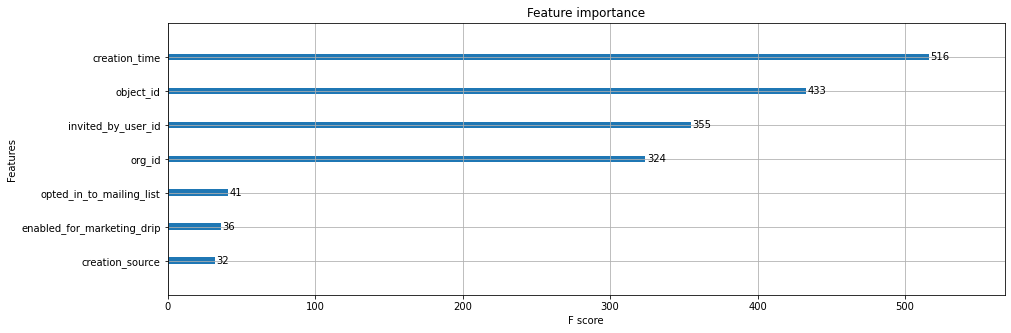

In [436]:
from xgboost import plot_importance
fig,ax = plt.subplots(1,1,figsize=(15,5))
plot_importance(clf,ax=ax)

#  which factors predict future user adoption.


> It seems that creation_time might be the critical factor for predicting future user adoption.

